<a href="https://colab.research.google.com/github/khushidubeyokok/AI-ML/blob/main/02_Unsupervised_learning/05_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# t-SNE (t-distributed Stochastic Neighbor Embedding)
- It is a nonlinear dimensionality reduction technique, mainly used to visualize high-dimensional data in 2D or 3D.
- it tries to keep points that are close in high-dimensional space also close in low-dimensional space.

## Working of t-SNE
1. In the original **high-dimensional space** — For every pair of points, it computes a probability that they are “neighbors,” using a Gaussian distribution (closer points get higher probability).

2. In the **low-dimensional space** — It puts points randomly, then defines a similar probability distribution, but here it uses a Student’s t-distribution instead of Gaussian. This heavier-tailed curve helps avoid the “crowding problem” where distant points collapse together.

3. **Match the neighborhoods** — It adjusts the positions of points in the low-dimensional map so that the neighbor probabilities match between original and reduced space as closely as possible. The mismatch is measured using Kullback–Leibler divergence, and gradient descent minimizes it.

4. Result — Points that were close in the high-dimensional space stay close in 2D/3D; far-away clusters separate naturally, but distances between far points are less meaningful.


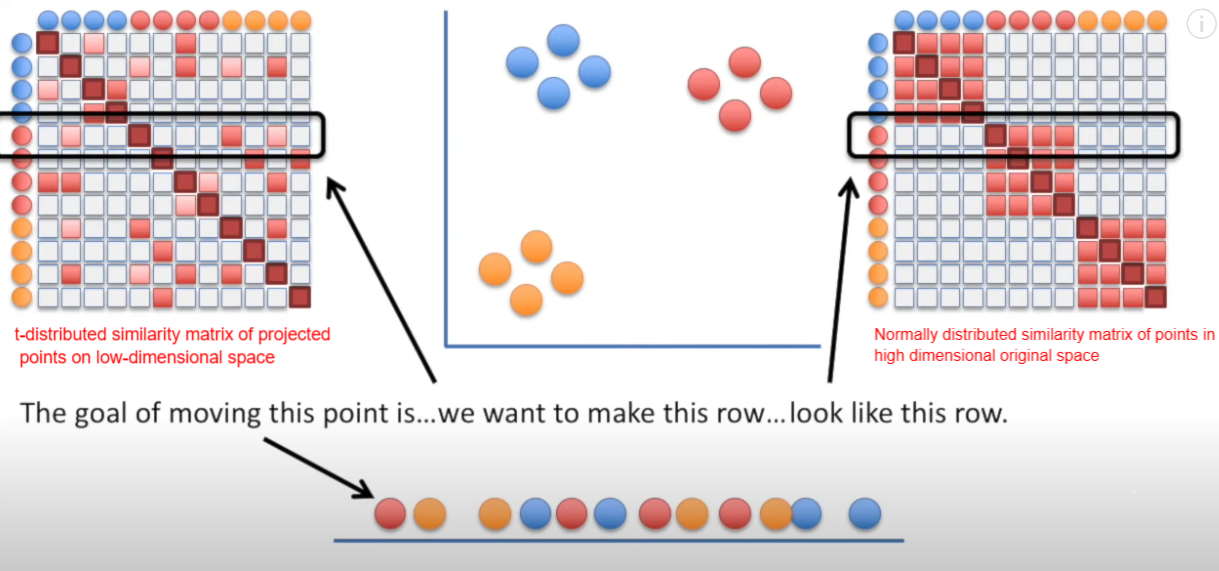

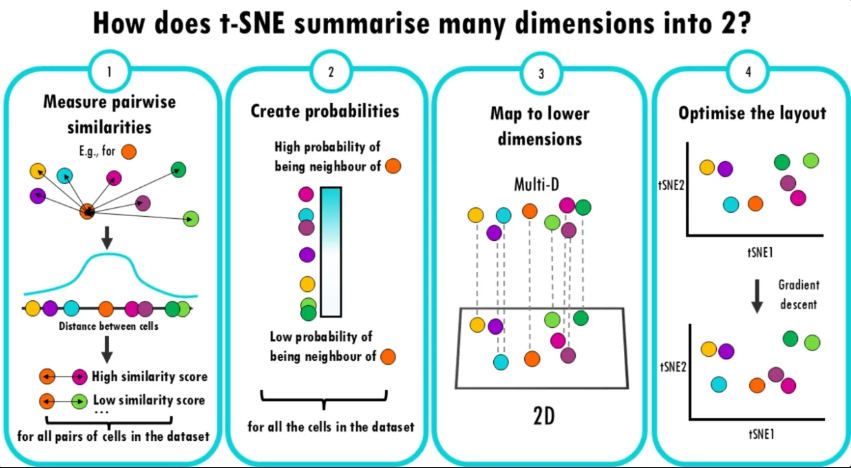


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [40]:
from sklearn.datasets import load_digits

In [41]:
dataset=load_digits()

<Figure size 640x480 with 0 Axes>

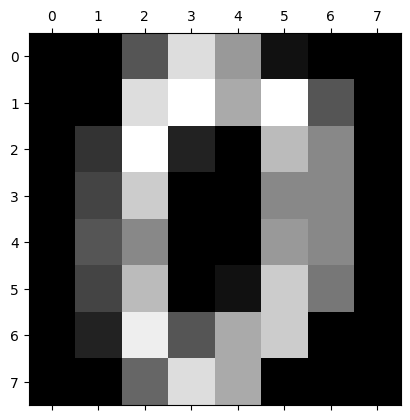

In [42]:
plt.gray()
plt.matshow(dataset.data[0].reshape(8,8))

In [43]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names) #8*8=64 features
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Scaling data

In [44]:
X = df
y = dataset.target

In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

TSNE
- Here we will use a parameter 'perplexity' which is important to balance local vs global structure in data

In [46]:
tsne= TSNE(learning_rate=500,n_components=2,perplexity=30)
x_tsne=tsne.fit_transform(X_scaled)

Visualisation

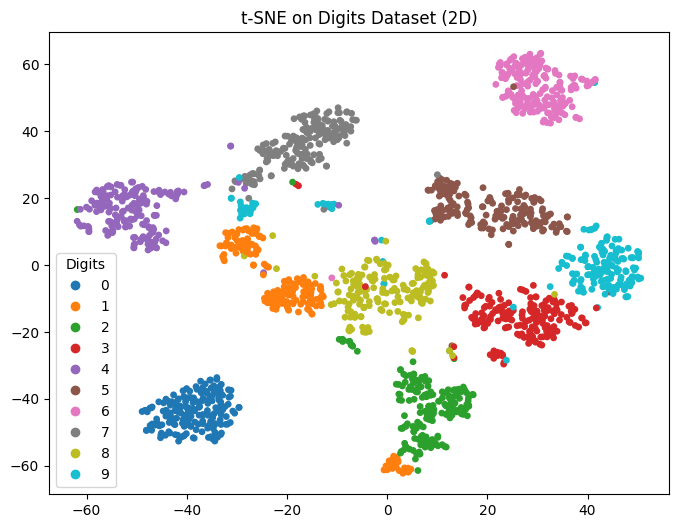

In [47]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(x_tsne[:,0], x_tsne[:,1], c=y, cmap='tab10', s=15)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title("t-SNE on Digits Dataset (2D)")
plt.show()

Now trying this with `load_iris` dataset from sklearn.datasets

In [48]:
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

In [49]:
# Load dataset
iris = load_iris()
X, y = iris.data, iris.target
target_names = iris.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [50]:
X[0] #4 features originally

array([5.1, 3.5, 1.4, 0.2])

It is hard to visualise 4 features at once

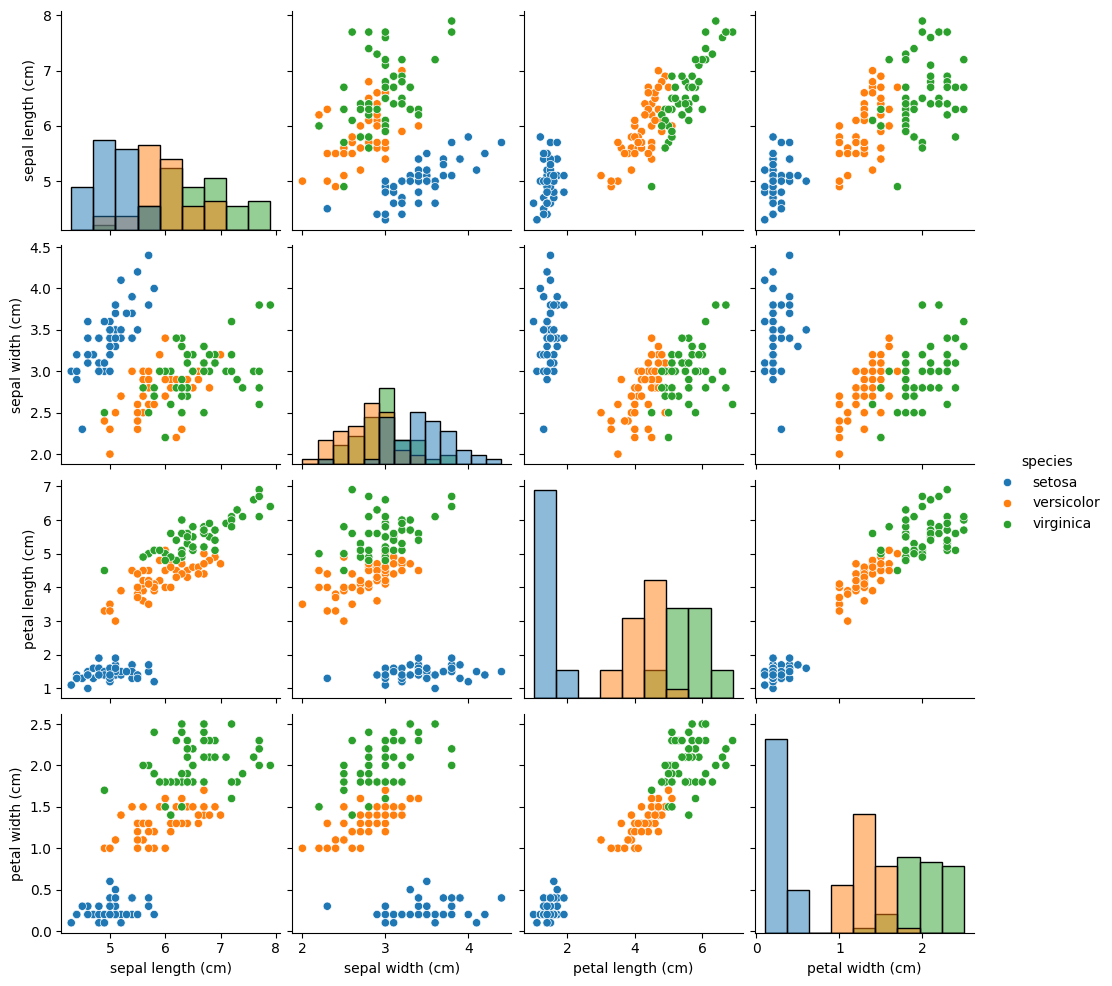

In [51]:
import seaborn as sns
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = [iris.target_names[i] for i in iris.target]

# Pairplot of all 4 features
sns.pairplot(df, hue='species', diag_kind='hist')
plt.show()

In [52]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

In [53]:
X_tsne[0] # now x has only 2 features

array([-24.28467   ,  -0.19606885], dtype=float32)

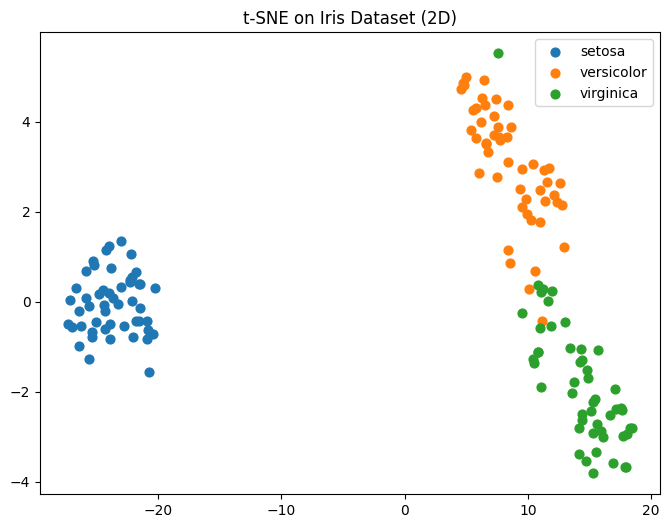

In [54]:
# Visualize
plt.figure(figsize=(8,6))
for i, name in enumerate(target_names):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], label=name, s=40)

plt.legend()
plt.title("t-SNE on Iris Dataset (2D)")
plt.show()